Import Libraries to Work With and Verify Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the dataset from github
# had errors importing, used 'on_bad_lines = 'warn'' to know which lines were having problems, found solution with RAW version of data - no more warnings - continue

df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv', on_bad_lines ='warn')

In [3]:
# check data see it makes sense - looks good - continue
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [4]:
# check data for data + types we are working with in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [5]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


Calculate Rate of Churn and Examining Reason for Churn

In [6]:
# Lets check what percentage of customers are actually churning (could have just used the mean value - also shown in the info of number of entries)
churned_perc = (((df['Churned']== 1).sum()) / len(df))*100 
print(churned_perc)

24.6


In [7]:
# 24.6% of customers are churning - ok, what are the reasons? lets only look at those which have churned and see how many unique responses were given, ignore empty cells, from info() we know that if they churned they gave a reason 
df['Reason_for_Churn'].dropna().unique()


array(['Found better service', 'Price increase',
       'Dissatisfied with content', 'Personal reasons'], dtype=object)

Text(0.5, 1.0, 'Churners Breakdown by Reason')

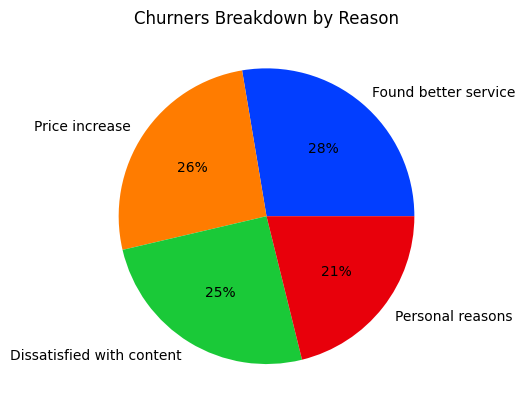

In [8]:
# 4 unique responses for Churners, lets see the percentage response of each - lets graph it

palette_color = sns.color_palette('bright')
plt.pie((df['Reason_for_Churn']).dropna().value_counts(), labels=df['Reason_for_Churn'].dropna().unique(), colors=palette_color, autopct='%.0f%%')
plt.title('Churners Breakdown by Reason')

Fig 1.1

Checking Relationship between Age and Churners and Reason for Churn

In [9]:
# That's quite an even spread, lets see if the churned people have a common demographic age?
churned_ages = df.loc[df['Churned'] == 1, 'Age']
churned_ages

12     41
13     70
14     53
16     41
29     39
       ..
983    26
991    34
992    43
995    25
998    69
Name: Age, Length: 246, dtype: int64

In [10]:
# Checked we have the right data - Continue - Lets Split it into Age Groups
churned_ages.describe() # checked the oldest and youngest person to determine group sizes 18 - 70

count    246.000000
mean      43.174797
std       15.507139
min       18.000000
25%       30.000000
50%       41.000000
75%       56.000000
max       70.000000
Name: Age, dtype: float64

([<matplotlib.axis.XTick at 0x2d67ae5a390>,
 [Text(0, 0, '18-28'),
  Text(1, 0, '29-39'),
  Text(2, 0, '40-49'),
  Text(3, 0, '50-59'),
  Text(4, 0, '60-70')])

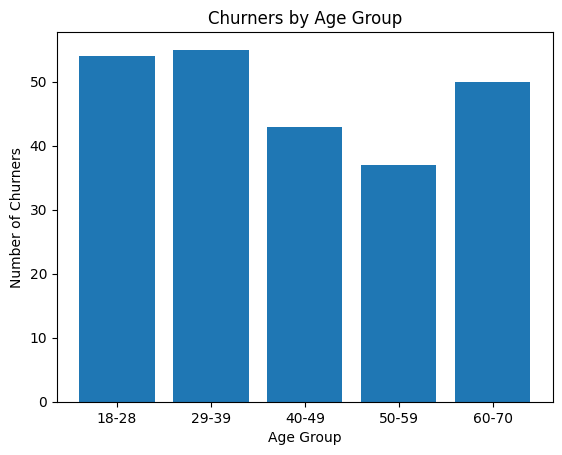

In [11]:
# Lets define some age groups
age_bins = [18, 29, 40, 50, 60, 71] # groups 18-28, 29-39, 40-49, 50-59, 60-70
age_groups = pd.cut(churned_ages, bins=age_bins) # split the data into the groups
age_counts = age_groups.value_counts().sort_index() # count the number of entries in each group
plt.bar(age_counts.index.astype(str), age_counts.values) # bar graph with the age groups on the x axis displayed as a string, and the values for each age group on the y-axis
plt.xlabel('Age Group')
plt.ylabel('Number of Churners')
plt.title('Churners by Age Group')
plt.xticks([0,1,2,3,4], ["18-28","29-39","40-49","50-59","60-70"])

Fig 1.2

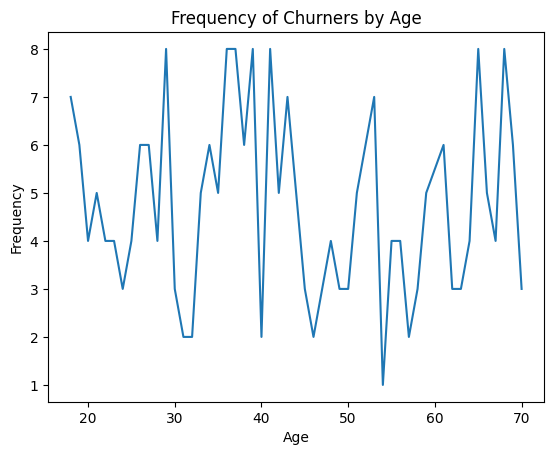

In [12]:
# Lets look at it a different way, maybe the above graph is too simplified

from matplotlib.ticker import MultipleLocator

churned_ages_df = pd.DataFrame(churned_ages, columns=['Age']) # should have probably made this a Dataframe from the beginining 
age_counts = churned_ages_df['Age'].value_counts()

sns.lineplot(x=churned_ages_df['Age'].value_counts().index, y=churned_ages_df['Age'].value_counts().values) #bar plot with age on the x-axis and frequency on the y-axis

plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Frequency of Churners by Age')
plt.gca().xaxis.set_major_locator(MultipleLocator(10)) # Better display the x-axis labels instead of listing every single age

Fig 1.2.1

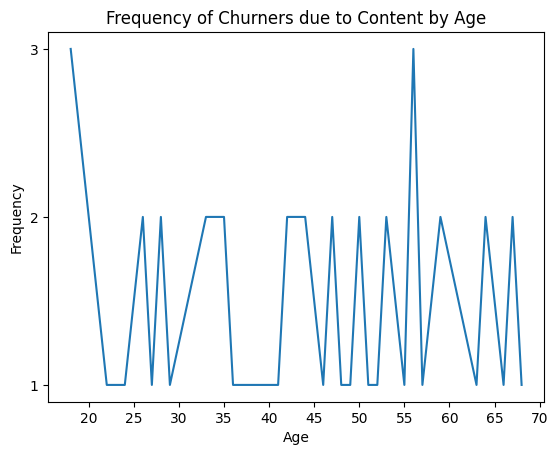

In [13]:
# Still doesn't seem to be any particular area of Ages that are churning, there are spikes all throughout the data, what if we check the churners who specified CONTENT as the reason they churned, maybe the content is not good for specific ages

churned_ages_content = df.groupby(['Churned','Reason_for_Churn']).get_group((1,'Dissatisfied with content'))
sns.lineplot(x=churned_ages_content['Age'].value_counts().index, y=churned_ages_content['Age'].value_counts().values)

plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Frequency of Churners due to Content by Age')
plt.gca().xaxis.set_major_locator(MultipleLocator(5)) # Better display the x-axis without listing every single age
plt.gca().yaxis.set_major_locator(MultipleLocator(1)) # It was labeling 0.5 increments on the y-axis which isn't possible to have half a user, so corrected to only whole numbers

Fig 1.2.2

In [14]:
# Another fairly evenly distributed relationship, no obvious age groups that are churning due to content - maybe Age isn't the way to go
df.describe(include=['O'])

,Gender,Location,Subscription_Start_Date,Subscription_Type,Payment_Method,Favorite_Genre,Devices_Used,Date_of_Churn,Reason_for_Churn
count,1000,1000,1000,1000,1000,1000,1000,246,246
unique,3,5,1000,3,3,5,4,246,4
top,Other,West,2020-06-07 01:53:37.656934,Standard,Credit Card,Drama,Mobile,2021-06-13 01:53:37.657108,Price increase
freq,336,216,1,530,613,212,408,1,68


Exploring Date of Churn and Reason for Churning - Price 

In [15]:
# I want to start using the Date coloumns, but they are currently strings displaying all the milliseconds, I need to convert them to datetime objects and remove time, I don't care about what time of day they cancelled
df['Churn_Date'] = pd.to_datetime(df['Date_of_Churn']).dt.date
df['Churn_Date'].head() # check that everything worked -> I just set all the empty cells to NaT

0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
Name: Churn_Date, dtype: object

In [16]:
# Check the first 5 values that are not NaT (have to use boolean mask here) - Looks good
df[df['Churn_Date'].notnull()].head()


,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Churn_Date
12,13,41,Other,North,2021-04-22 01:53:37.657108,Standard,14.99,Direct Debit,14.011035,Sci-Fi,Mobile,0.152133,1059,5,1,2021-06-13 01:53:37.657108,Found better service,2021-06-13
13,14,70,Other,South,2020-10-29 01:53:37.657119,Standard,14.99,Direct Debit,35.339461,Sci-Fi,Mobile,3.346005,1011,2,1,2021-03-11 01:53:37.657119,Found better service,2021-03-11
14,15,53,Other,East,2023-10-06 01:53:37.657130,Standard,14.99,Credit Card,14.191293,Documentary,Mobile,2.791956,1020,1,1,2024-07-02 01:53:37.657130,Price increase,2024-07-02
16,17,41,Other,South,2019-07-27 01:53:37.657151,Premium,19.99,Credit Card,12.991876,Drama,Mobile,2.519855,1043,1,1,2020-03-16 01:53:37.657151,Found better service,2020-03-16
29,30,39,Male,North,2019-11-05 01:53:37.657296,Standard,14.99,Credit Card,22.258651,Comedy,Mobile,0.838116,1034,2,1,2020-08-13 01:53:37.657296,Price increase,2020-08-13


<Axes: ylabel='Churn_Date'>

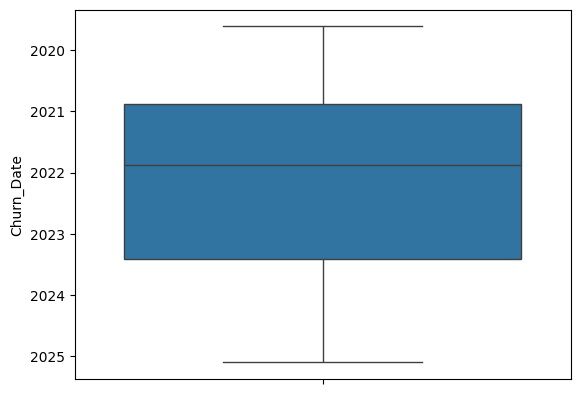

In [17]:
# Boxplot the churn_date data
sns.boxplot(df['Churn_Date'][df['Churn_Date'].notnull()])

<Axes: ylabel='Churn_Date'>

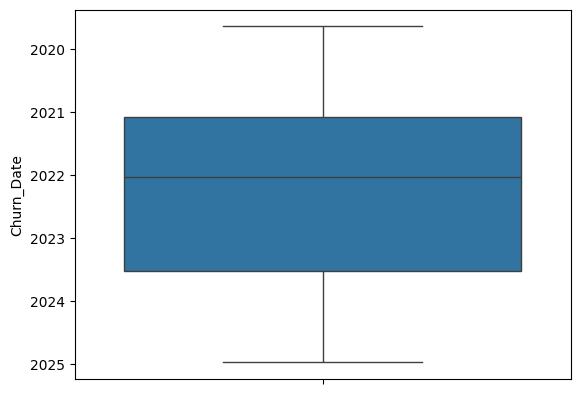

In [18]:
# Box Plot the Churners with reason 'Price Increase' by Date
sns.boxplot(df['Churn_Date'][(df['Churn_Date'].notnull()) & (df['Reason_for_Churn'] == 'Price increase')])

Text(0.5, 0, 'Subscription Type')

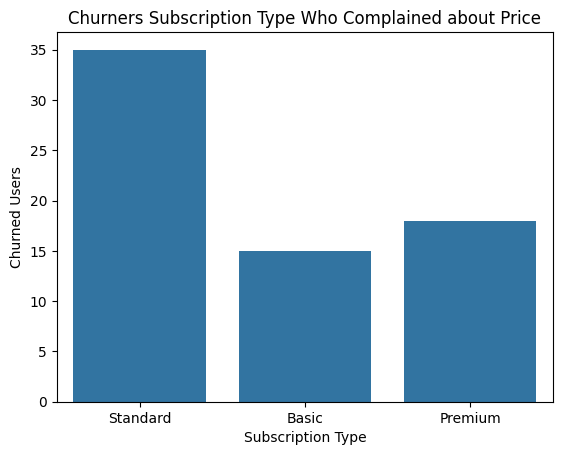

In [19]:
# Soooo how often is this business increasing the price? or maybe people who chose this option just don't like the price?
# Lets take it back to the churners, lets grab all the price complainers and seperate them by which sub type they have

price_inc = df[df['Reason_for_Churn'] == 'Price increase']
price_inc_count = price_inc['Subscription_Type'].value_counts()


sns.barplot(price_inc_count,order=['Standard','Basic','Premium'])
plt.title('Churners Subscription Type Who Complained about Price')
plt.ylabel('Churned Users')
plt.xlabel('Subscription Type')

Text(0.5, 1.0, 'Total Churners Subscription Type')

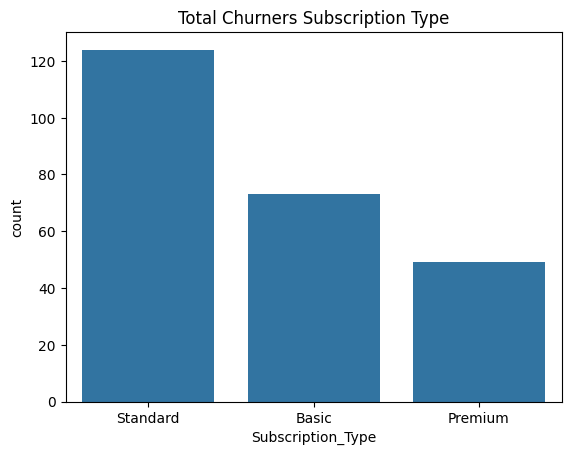

In [20]:
# Something useful, standard is the most common to be cancelled according to price - safe to infer that the standard price is too expensive? - maybe not
# Lets compare to all of the churners, what type of subscription they have

churned_data = df[df['Churned'] == 1]

sns.barplot(churned_data['Subscription_Type'].value_counts())
plt.title('Total Churners Subscription Type')

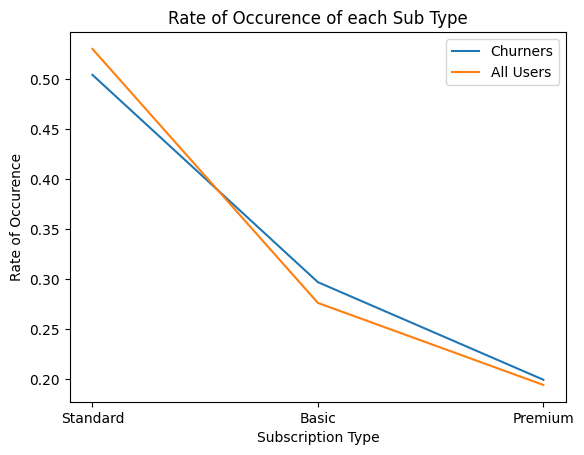

In [21]:
# Generate a plot that maps all users subscription breakdown compared to the churners subscription breakdown to check for any difference in trend

rate_of_churn_sub_type = churned_data['Subscription_Type'].value_counts() / churned_data['Subscription_Type'].value_counts().sum()
user_sub_type = df['Subscription_Type'].value_counts() / df['Subscription_Type'].value_counts().sum()


plt.plot(rate_of_churn_sub_type, label='Churners')
plt.plot(user_sub_type, label='All Users')

plt.title('Rate of Occurence of each Sub Type')
plt.xlabel('Subscription Type')
plt.ylabel('Rate of Occurence')
plt.legend()

Fig 1.3.1

Here we can see that contrary to expectations, Standard package actually has the lowest rate of churn compared to total user breakdown of subscription type

Text(0.5, 0, 'Subscription Type')

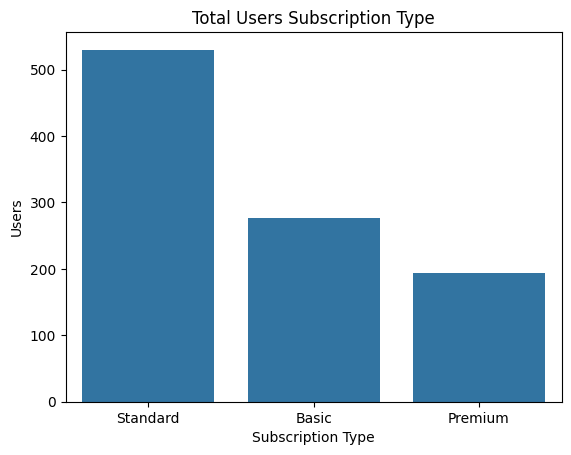

In [22]:
# Lets compare to the overall distribution of the data by subscription type

sns.barplot(df['Subscription_Type'].value_counts())
plt.title('Total Users Subscription Type')
plt.ylabel('Users')
plt.xlabel('Subscription Type')

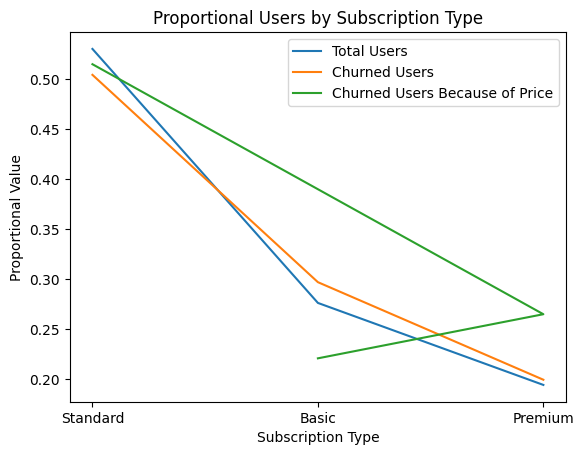

In [23]:
# Create a plot that shows the proportional rate of each subscription type divided by total users, churned users and churned users who selected price as churn reason overlayed on top of eachother to see any noticeable differences

plt.plot(df['Subscription_Type'].value_counts() / df['Subscription_Type'].value_counts().sum(), label="Total Users")
plt.plot(churned_data['Subscription_Type'].value_counts() / churned_data['Subscription_Type'].value_counts().sum(), label="Churned Users")
plt.plot(price_inc_count / price_inc_count.sum(), label="Churned Users Because of Price")
plt.xlabel('Subscription Type')
plt.ylabel('Proportional Value')
plt.title('Proportional Users by Subscription Type')
plt.legend()

Fig 1.3.2

In these 4 models, we can see that people who complained about price were mostly Standard & Premium Users, which differs from the normal distribution of Standard and Basic being the most used. Premium Package may be too expensive


In [24]:
# Lets look at Genre now
df['Favorite_Genre'].value_counts()

Favorite_Genre
Drama          212
Action         205
Comedy         203
Sci-Fi         192
Documentary    188
Name: count, dtype: int64

In [25]:
# Thats a REALLY even spread, thats good, lets see if its the same with the churners

churned_data['Favorite_Genre'].value_counts()

Favorite_Genre
Documentary    52
Sci-Fi         49
Comedy         49
Action         49
Drama          47
Name: count, dtype: int64

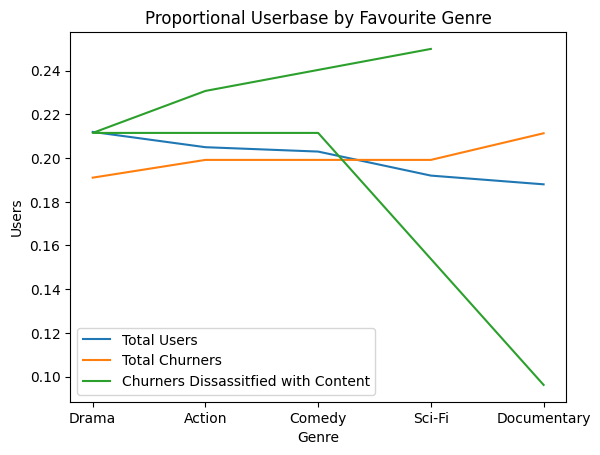

In [26]:
# Lets graph the total dataset compared to the churned data compared to the churned data where users selected 'Dissatisfied with content' based on Genre

churn_content = churned_data[churned_data['Reason_for_Churn'] == "Dissatisfied with content"]


plt.plot(df['Favorite_Genre'].value_counts() / df['Favorite_Genre'].value_counts().sum(), label = 'Total Users')
plt.plot(churned_data['Favorite_Genre'].value_counts() / churned_data['Favorite_Genre'].value_counts().sum(), label = 'Total Churners')
plt.plot(churn_content['Favorite_Genre'].value_counts() / churn_content['Favorite_Genre'].value_counts().sum(), label = 'Churners Dissassitfied with Content')
plt.xlabel('Genre')
plt.ylabel('Users')
plt.title('Proportional Userbase by Favourite Genre')
plt.legend()

Fig 1.4

Content does not seem to be the issue, based on Genre

In [27]:
# Well lets see if device used has a relationship here

df['Devices_Used'].value_counts()

Devices_Used
Mobile    408
Tablet    217
TV        201
PC        174
Name: count, dtype: int64

In [28]:
# Comparing overall devices used spread to that of the Churners devices used

churned_data['Devices_Used'].value_counts()

Devices_Used
Mobile    131
Tablet     44
TV         44
PC         27
Name: count, dtype: int64

Text(0.5, 1.0, 'Churners vs Total Users by Device Type')

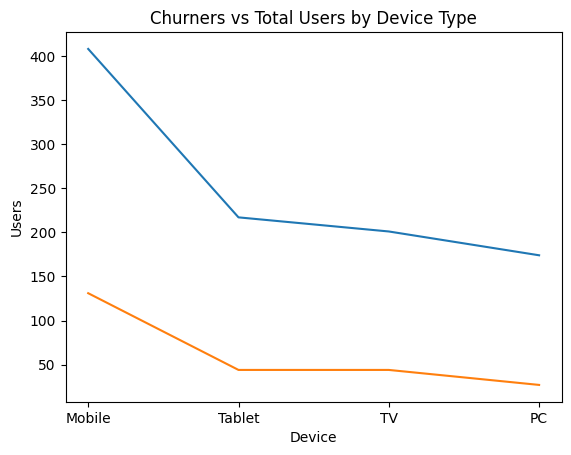

In [29]:
# Plot the people leaving by devices and total dataset of devices used

plt.plot(df['Devices_Used'].value_counts(), label="Total Users")
plt.plot(churned_data['Devices_Used'].value_counts(), label = "Churned Users")
plt.xlabel('Device')
plt.ylabel('Users')
plt.title('Churners vs Total Users by Device Type')

Fig 1.5

Device Type does not seem to be relevent to churning

In [30]:
# Lets try location

df['Location'].value_counts()

Location
West       216
North      204
Central    201
East       200
South      179
Name: count, dtype: int64

In [31]:
# Compare to churners

churned_data['Location'].value_counts()

Location
East       60
North      53
Central    47
West       44
South      42
Name: count, dtype: int64

Text(0.5, 1.0, 'Proportion of Users vs Churners by Location')

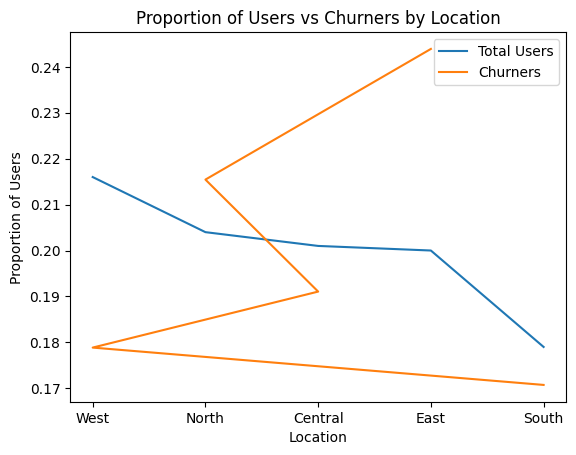

In [32]:
# Compare the proportion of users by location to churners by location

plt.plot(df['Location'].value_counts() / df['Location'].value_counts().sum(), label="Total Users")
plt.plot(churned_data['Location'].value_counts() / churned_data['Location'].value_counts().sum(), label = "Churners")
plt.legend()
plt.xlabel('Location')
plt.ylabel('Proportion of Users')
plt.title('Proportion of Users vs Churners by Location')

Fig 1.6

Churners are proportionally coming from East and North locations more so than other locations - these locations should be consider higher risk to churn

Investigate Content ID and potential relationships it has with churners

In [33]:
# Investigate Content_ID

df['Content_ID'].value_counts()

Content_ID
1012    20
1027    17
1077    17
1043    17
1086    16
        ..
1060     6
1030     6
1040     5
1048     5
1081     2
Name: count, Length: 100, dtype: int64

In [34]:
# Investigate Content ID of Churners

churned_data['Content_ID'].value_counts()

Content_ID
1088    6
1009    6
1094    6
1095    6
1046    5
       ..
1038    1
1026    1
1084    1
1083    1
1035    1
Name: count, Length: 94, dtype: int64

In [55]:
# 6 out of 100 Content_ID's have never churned, lets find out what values

value_counts_df = df['Content_ID'].value_counts()
value_counts_churned = churned_data['Content_ID'].value_counts()

# find the unique values in df that do not appear in the churned data

unique_to_df = value_counts_df.index.difference(value_counts_churned.index)

unique_to_df

Index([1021, 1029, 1032, 1048, 1072, 1081], dtype='int64', name='Content_ID')

Content ID: [ 1021, 1029, 1032, 1048, 1072, 1081 ] - Have Never Churned - Best Content ID's

Content ID: [ 1009, 1088, 1094, 1095 ] - Highest Frequency of Churning - Worst Content ID's

Ref 1.1

Text(0, 0.5, 'Users')

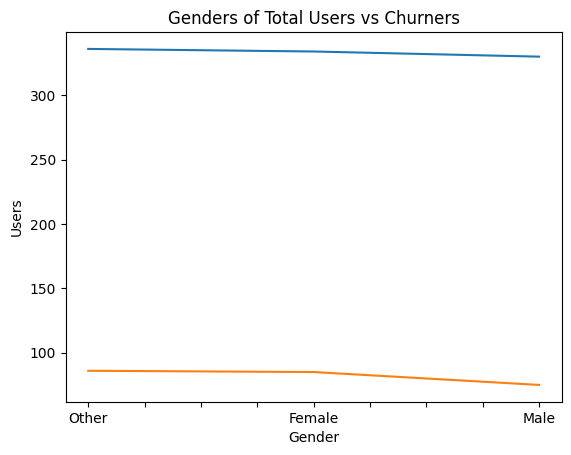

In [36]:
# Gender Data - total users gender vs churners gender

df['Gender'].value_counts().plot()
churned_data['Gender'].value_counts().plot()
plt.title('Genders of Total Users vs Churners')
plt.ylabel('Users')


Fig 1.7

In [37]:
# Create a colomn isolating the Year that people churned, so we can analyze frequency of churners by Years

df.loc[:,'Churn_Date'] = pd.to_datetime(df['Churn_Date'])

df.loc[:,'Churn_Year'] = df['Churn_Date'].apply(lambda x: x.year)

# Redefine churned_data to include new columns

churned_data = df[df['Churned'] == 1]

# Count the values each year appears

df['Churn_Year'].value_counts()

Churn_Year
2021.0    63
2020.0    58
2023.0    49
2024.0    32
2022.0    30
2019.0    11
2025.0     3
Name: count, dtype: int64

Text(0.5, 1.0, 'Churned Users by Year')

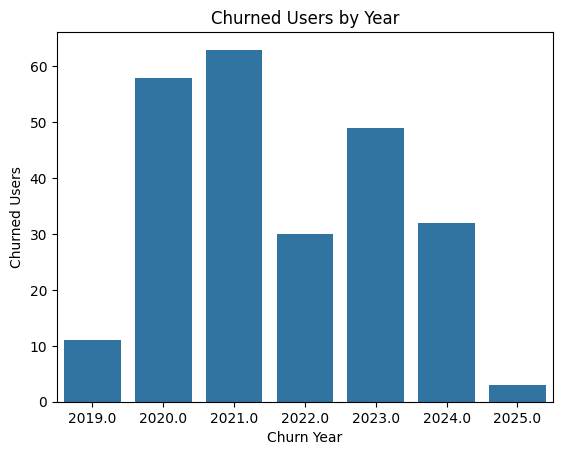

In [38]:
# Put it on a graph to visualize

sns.barplot(churned_data['Churn_Year'].value_counts())
plt.xlabel('Churn Year')
plt.ylabel('Churned Users')
plt.title('Churned Users by Year')


Fig 1.8

We found something! 

([0, 1, 2, 3],
 [Text(0, 0, 'Dissatisfied with content'),
  Text(1, 0, 'Found better service'),
  Text(2, 0, 'Personal reasons'),
  Text(3, 0, 'Price increase')])

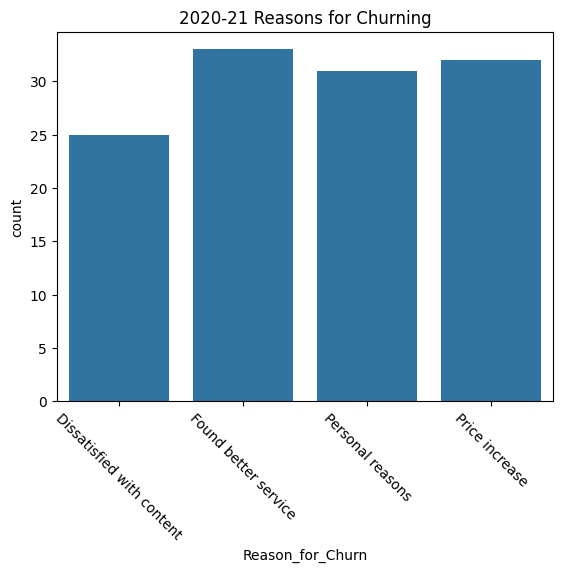

In [39]:
# Isolate the year 2020 and 2021 by the reasons - biggest spike of churners

churned_data_2020_2021 = churned_data[(churned_data['Churn_Year'] == 2021) | (churned_data['Churn_Year'] == 2020)]

reasons_counts = churned_data_2020_2021['Reason_for_Churn'].value_counts()
reasons_sorted = reasons_counts.index.sort_values()

sns.barplot(churned_data_2020_2021['Reason_for_Churn'].value_counts(), order=reasons_sorted)
plt.title('2020-21 Reasons for Churning')
plt.xticks(rotation=-45)


Fig 1.8.1

([0, 1, 2, 3],
 [Text(0, 0, 'Dissatisfied with content'),
  Text(1, 0, 'Found better service'),
  Text(2, 0, 'Personal reasons'),
  Text(3, 0, 'Price increase')])

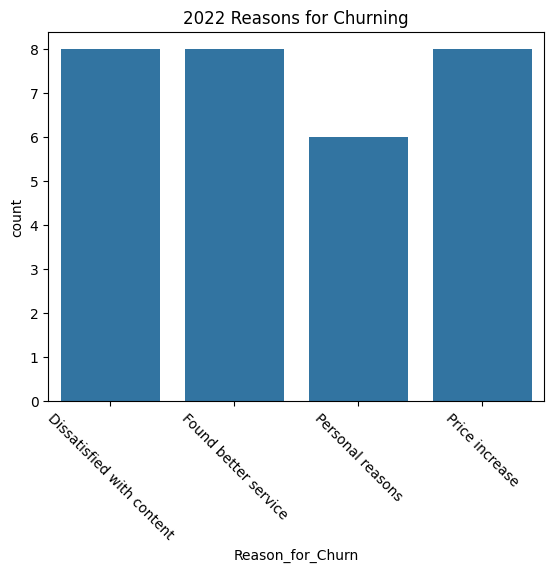

In [40]:
# Continue the same for 2022

churned_data_2022 = churned_data[churned_data['Churn_Year'] == 2022]

reasons_counts = churned_data_2022['Reason_for_Churn'].value_counts()
reasons_sorted = reasons_counts.index.sort_values() # I wanted to make sure all the graphs sorted the x-axis in the same order for easy comparison

sns.barplot(churned_data_2022['Reason_for_Churn'].value_counts(), order=reasons_sorted)
plt.title('2022 Reasons for Churning')
plt.xticks(rotation=-45)

([0, 1, 2, 3],
 [Text(0, 0, 'Dissatisfied with content'),
  Text(1, 0, 'Found better service'),
  Text(2, 0, 'Personal reasons'),
  Text(3, 0, 'Price increase')])

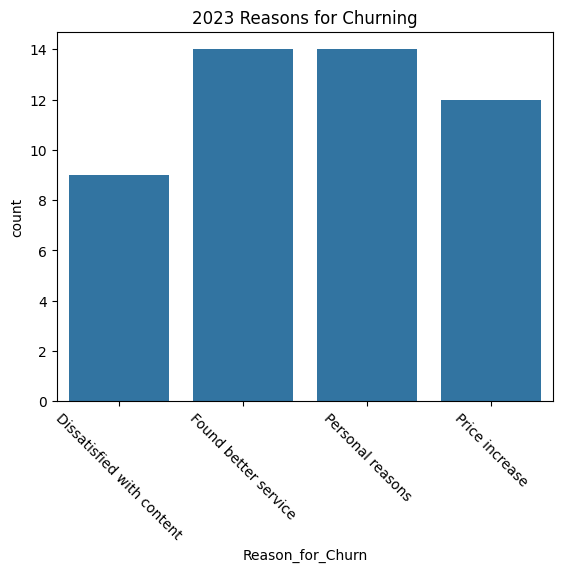

In [41]:
# Repeat again for 2023

churned_data_2023 = churned_data[churned_data['Churn_Year'] == 2023]

sns.barplot(churned_data_2023['Reason_for_Churn'].value_counts(), order=reasons_sorted)
plt.title('2023 Reasons for Churning')
plt.xticks(rotation=-45)

([0, 1, 2, 3],
 [Text(0, 0, 'Dissatisfied with content'),
  Text(1, 0, 'Found better service'),
  Text(2, 0, 'Personal reasons'),
  Text(3, 0, 'Price increase')])

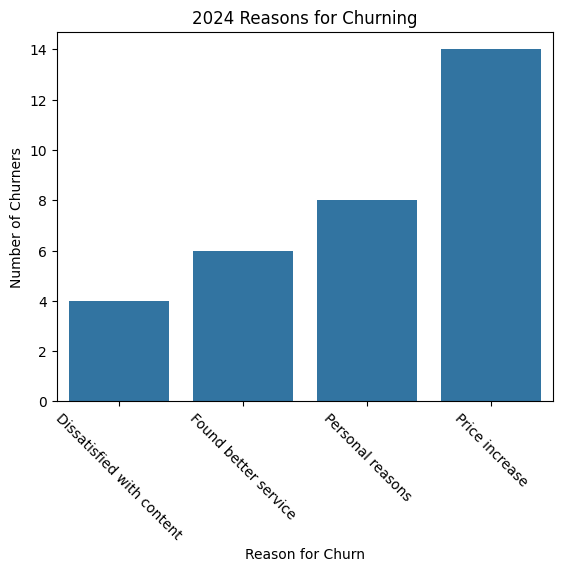

In [42]:
# Repeat again for 2024

churned_data_2024 = churned_data[(churned_data['Churn_Year'] == 2024)]

sns.barplot(churned_data_2024['Reason_for_Churn'].value_counts(), order=reasons_sorted)
plt.title('2024 Reasons for Churning')
plt.xlabel('Reason for Churn')
plt.ylabel('Number of Churners')
plt.xticks(rotation=-45)

Fig 1.8.2

In [43]:
# Check the breakdown of subscription types in those users that specified price increase in 2024

churned_data_2024['Subscription_Type'][churned_data_2024['Reason_for_Churn'] == 'Price increase'].value_counts()

Subscription_Type
Standard    6
Premium     4
Basic       4
Name: count, dtype: int64

Ref 1.2

Text(0.5, 1.0, 'Churn Date vs Rating')

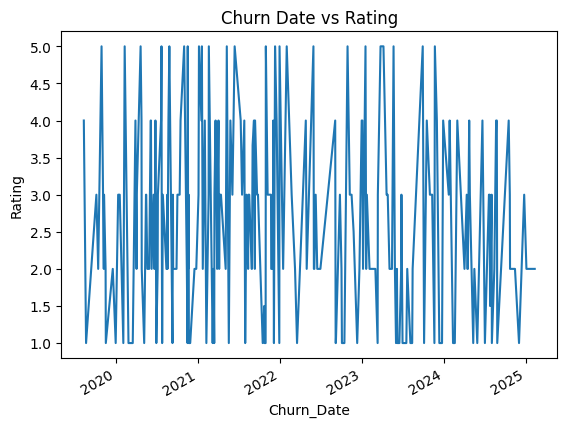

In [44]:
# Checking relationship between when the churners churn and the rating that they gave

df.groupby('Churn_Date')['Rating_Given'].mean().sort_index().plot()
plt.ylabel('Rating')
plt.title('Churn Date vs Rating')

Text(0.5, 1.0, 'Average Rating for each Reason for Churn')

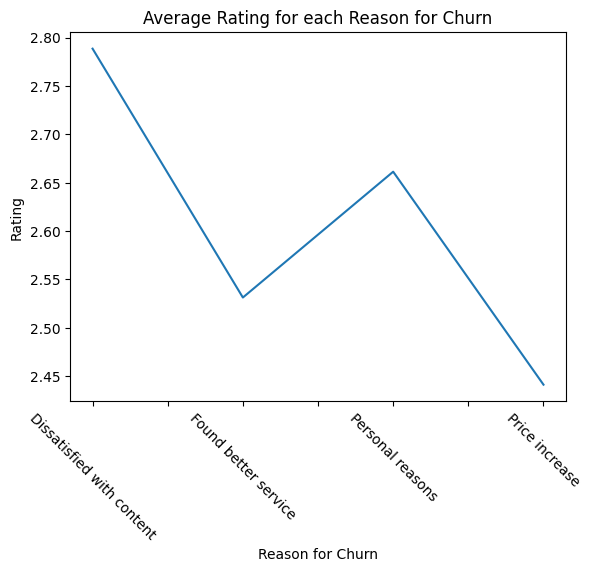

In [45]:
# Check the relationship between Average Rating given per Reason for churning

df.groupby('Reason_for_Churn')['Rating_Given'].mean().sort_index().plot()
plt.xticks(rotation=-45)
plt.ylabel('Rating')
plt.xlabel('Reason for Churn')
plt.title('Average Rating for each Reason for Churn')

In [46]:
# Avg Rating Given per Content_ID

df.groupby('Content_ID')['Rating_Given'].mean().sort_values().head(15)

Content_ID
1084    2.000000
1060    2.166667
1005    2.300000
1075    2.333333
1055    2.428571
1050    2.444444
1079    2.454545
1090    2.500000
1028    2.500000
1017    2.500000
1020    2.538462
1032    2.555556
1099    2.600000
1045    2.615385
1064    2.625000
Name: Rating_Given, dtype: float64

In [47]:
# Create new Column Avg_Rating which is the average rating for the given Content_ID

df['Avg_Rating'] = df.groupby('Content_ID')['Rating_Given'].transform('mean')

In [48]:
# Create new Column Comp_Rat_Avg which compares the Rating Given to the Avg Rating - >= 0 is good here

df['Comp_Rat_Avg'] = df['Rating_Given'] - df['Avg_Rating']

Text(0.5, 1.0, 'Churners Rating Differ from Average')

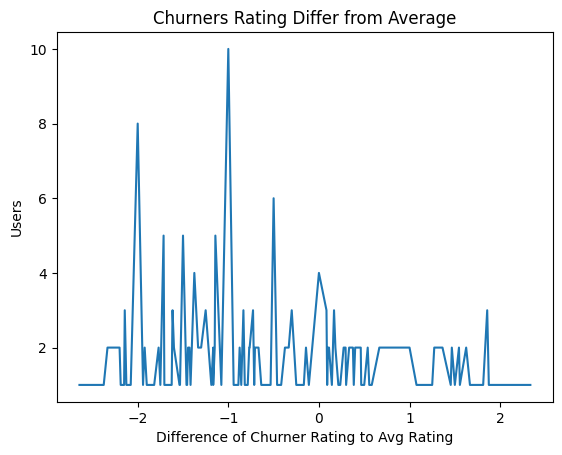

In [49]:
# Graph the churners according to the difference between their rating and the average rating of specific content ID

df[df['Churned'] == 1].groupby('Comp_Rat_Avg').size().plot()
plt.ylabel('Users')
plt.xlabel('Difference of Churner Rating to Avg Rating')
plt.title('Churners Rating Differ from Average')

Text(0.5, 1.0, 'User Rating Differ from Average')

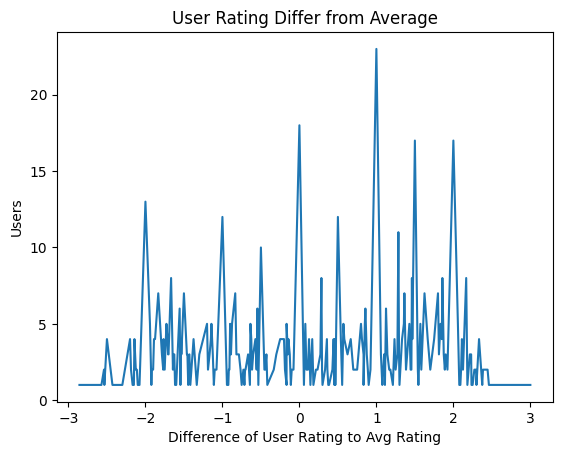

In [50]:
# Graph the users who don't churn's rating vs the average rating of specific content ID

df[df['Churned'] == 0].groupby('Comp_Rat_Avg').size().plot()
plt.ylabel('Users')
plt.xlabel('Difference of User Rating to Avg Rating')
plt.title('User Rating Differ from Average')

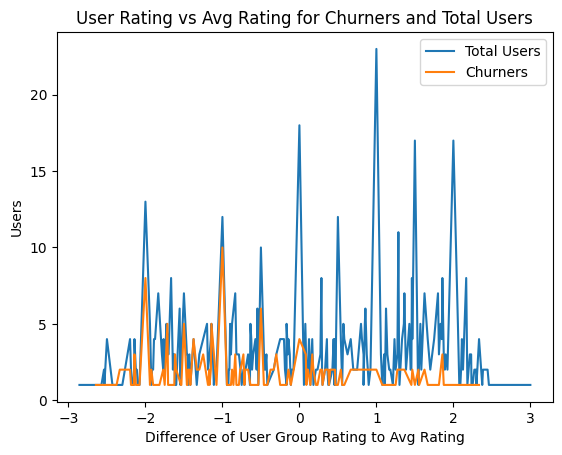

In [51]:
# Lets lay those two over, as they contrast heavily in shape

df[df['Churned'] == 0].groupby('Comp_Rat_Avg').size().plot(label='Total Users')
df[df['Churned'] == 1].groupby('Comp_Rat_Avg').size().plot(label='Churners')
plt.ylabel('Users')
plt.xlabel('Difference of User Group Rating to Avg Rating')
plt.title('User Rating vs Avg Rating for Churners and Total Users')
plt.legend()

Fig 1.9

We can use this metric to try and identify churners before they churn combined with an additional weighting towards East and North locations being high risk

In [52]:
# Creating Churn Location Coloumn to easily identify which users are in the high risk locations, setting values according to the weight - high risk = -1 and lower risk = 0

df['Churn_Location'] = df['Location'].isin(['East','North'])

df['Churn_Location'] = df['Churn_Location'].map({True: -1, False: 0})

df['Churn_Location'].value_counts()

Churn_Location
 0    596
-1    404
Name: count, dtype: int64

In [53]:
# Create a column Chance to Churn which should assign a rating to each user based on their Comp_Rat_Avg and Location (additional risk if in North or East locations) to predict their liklihood of churning

df['Chance_to_Churn'] = df['Comp_Rat_Avg'] + df['Churn_Location']
df['Chance_to_Churn'][df['Churned'] == False].describe() # We only want to look at those who have not churned

count    754.000000
mean      -0.252151
std        1.462835
min       -3.538462
25%       -1.525000
50%       -0.133929
75%        0.900000
max        2.700000
Name: Chance_to_Churn, dtype: float64

Ref 1.3

Use this new metric 'Chance_to_Churn' to identify churners before they churn and apply intervention strategies

In [54]:
# Check how many values are currently equal to or below 0 - Users who are currently at risk of churning

df['Chance_to_Churn'][(df['Churned'] == False) & (df['Chance_to_Churn'] <= 0)].describe()

count    407.000000
mean      -1.382921
std        0.905390
min       -3.538462
25%       -2.000000
50%       -1.416667
75%       -0.625000
max        0.000000
Name: Chance_to_Churn, dtype: float64